# Исследование депрессии

## Импортируем необходимые библиотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from scipy.stats.mstats import zscore
import warnings
warnings.filterwarnings("ignore") #не показывать предупреждения

## Обработка данных

In [3]:
df = pd.read_excel('Mental health Depression disorder Data.xlsx')

Общая инфа

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     6468 non-null   object 
 1   Code                       5488 non-null   object 
 2   Year                       6468 non-null   int64  
 3   Schizophrenia (%)          6468 non-null   float64
 4   Bipolar disorder (%)       6468 non-null   float64
 5   Eating disorders (%)       6468 non-null   float64
 6   Anxiety disorders (%)      6468 non-null   float64
 7   Drug use disorders (%)     6468 non-null   float64
 8   Depression (%)             6468 non-null   float64
 9   Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 505.4+ KB
None


In [5]:
df.head(10)

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
5,Afghanistan,AFG,1995,0.160076,0.698695,0.090980,4.828337,1.728112,4.104207,0.668746
6,Afghanistan,AFG,1996,0.160249,0.698914,0.089709,4.828083,1.737643,4.107500,0.667727
7,Afghanistan,AFG,1997,0.160554,0.699127,0.088372,4.827726,1.746891,4.110834,0.666220
8,Afghanistan,AFG,1998,0.160931,0.699372,0.087330,4.826971,1.756963,4.114438,0.664676
9,Afghanistan,AFG,1999,0.161311,0.699674,0.086267,4.826413,1.770791,4.117633,0.663428


In [6]:
rows, columns = df.shape
print("Размер таблицы:")
print("Строк:", rows)
print("Столбцов:", columns)

Размер таблицы:
Строк: 6468
Столбцов: 10


Изменим названия столбцов таблицы

In [7]:
df.columns = ['Country', 'Code', 'Year', 'Schizophrenia', 'Bipolar disorder', 'Eating disorders',
              'Anxiety disorders', 'Drug use disorders', 'Depression', 'Alcohol use disorders']

Список названий столбцов таблицы:

In [8]:
for i in range(len(df.columns)):
    print(i + 1, df.columns[i])
print("\n")
print(df.dtypes)

1 Country
2 Code
3 Year
4 Schizophrenia
5 Bipolar disorder
6 Eating disorders
7 Anxiety disorders
8 Drug use disorders
9 Depression
10 Alcohol use disorders


Country                   object
Code                      object
Year                       int64
Schizophrenia            float64
Bipolar disorder         float64
Eating disorders         float64
Anxiety disorders        float64
Drug use disorders       float64
Depression               float64
Alcohol use disorders    float64
dtype: object


1. Country - Страна
2. Code - Код страны
3. Year - Год
4. Schizophrenia - Шизофрения
5. Bipolar disorder - Биполярное расстройство
6. Eating disorders - Расстрйства пищевого поведения
7. Anxiety disorders - Тревожные расстройства
8. Drug use disorders - Расстройства, связанные с употреблением наркотиков
9. Depression - Депрессия
10. Alcohol use disorders - Расстройства, связанные с употреблением алкоголя

Создание матрицы пропущенных значений

<Axes: >

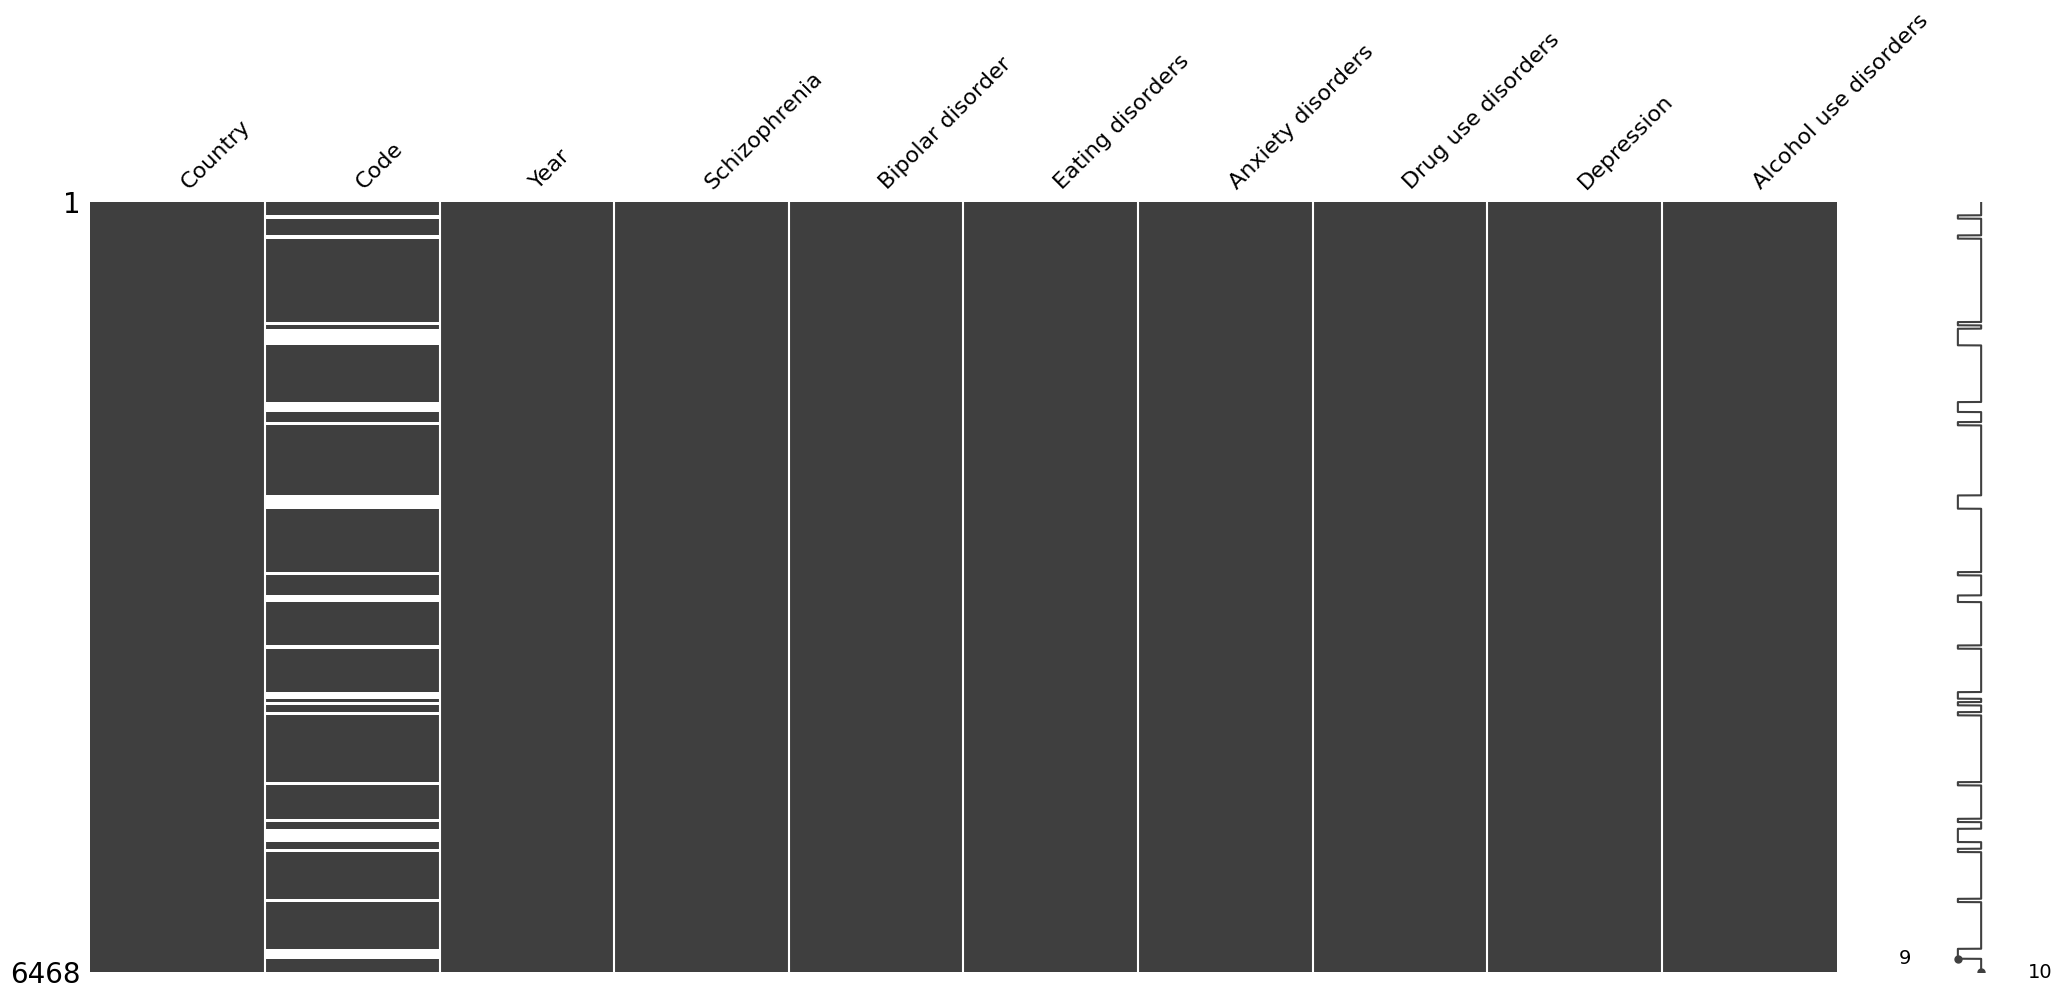

In [9]:
import missingno as msno

msno.matrix(df)

Из матрицы пропущенных значений следует, что все пропуски в наборе данных содержатся только в столбце с кодом страны, и если взглянуть на эти пропуски, то выходит, что пропуски представляют из себя страны, у которых нет своего кода, так что на данные эти пропуски влиять не будут

## Общий анализ

In [10]:
countries = df['Country']
countries = countries.unique()
for i in countries:
  print(i)


Afghanistan
Albania
Algeria
American Samoa
Andean Latin America
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australasia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Caribbean
Central African Republic
Central Asia
Central Europe
Central Europe, Eastern Europe, and Central Asia
Central Latin America
Central Sub-Saharan Africa
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czech Republic
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
East Asia
Eastern Europe
Eastern Sub-Saharan Africa
Ecuador
Egypt
El Salvador
England
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Greenland
Grenada
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
High SDI
High-income
High-income Asia Pacific
Hig

Количество стран:

In [11]:
print(len(countries))

231


Минимальный и максимальный года

In [12]:
print(min(df['Year']), max(df['Year']))

1990 2017


## Графики

Найдем топ-10 стран, в которых средняя депрессия минимальна, и
топ-10 стран, в которых максимальна

In [52]:
d = dict()
for i in countries:
    a = df[df['Country'] == i]
    d[i] = a['Depression'].mean()
# Страны, отсортированные по среднему показателю депрессии
sorted_depression = sorted(d.items(), key=lambda x: x[1])
# Топ 10 стран с минимальным показателем средней депрессии
min_depression = sorted_depression[:10]
for i in range(len(min_depression)):
    min_depression[i] = min_depression[i][0]
# Топ 10 стран с максимальным показателем средней депрессии
max_depression = sorted_depression[-10:]
for i in range(len(max_depression)):
    max_depression[i] = max_depression[i][0]
print("Топ-10 стран с мин. депрессией:", *min_depression)
print("Топ-10 стран с макс. депрессией:", *max_depression)

Топ-10 стран с мин. депрессией: Albania Myanmar Poland Colombia Peru Romania Macedonia Slovakia Bosnia and Herzegovina Central Europe
Топ-10 стран с макс. депрессией: Portugal United States Australia Palestine Iran Finland Uganda Lesotho Morocco Greenland


Сводная таблица для стран с миним. депрессией

In [14]:
a = df[df['Country'].isin(min_depression)]
table_min = a.pivot(index="Year", columns="Country", values="Depression")
table_min.head()

Country,Albania,Bosnia and Herzegovina,Central Europe,Colombia,Macedonia,Myanmar,Peru,Poland,Romania,Slovakia
Year,,,,,,,,,,
1990,2.139903,2.668364,2.577004,2.268150,2.420244,2.244310,2.364704,2.236951,2.367998,2.535570
1991,2.141201,2.672518,2.585486,2.280578,2.422464,2.246085,2.370735,2.252338,2.369771,2.541668
1992,2.143395,2.671643,2.591338,2.293496,2.424369,2.246402,2.375850,2.267182,2.370086,2.547234
1993,2.145263,2.671418,2.595275,2.304626,2.425562,2.248158,2.378036,2.280377,2.371618,2.549044
1994,2.150070,2.669313,2.597484,2.316248,2.426529,2.247234,2.379453,2.290941,2.372830,2.550926


Сводная таблица для стран с максим. депрессией

In [15]:
a = df[df['Country'].isin(max_depression)]
table_max = a.pivot(index="Year", columns="Country", values="Depression")
table_max.head()

Country,Australia,Finland,Greenland,Iran,Lesotho,Morocco,Palestine,Portugal,Uganda,United States
Year,,,,,,,,,,
1990,4.621187,5.427329,6.282583,4.712232,5.268593,5.468472,4.755201,4.748400,5.003476,4.677591
1991,4.671933,5.461775,6.382405,4.747700,5.237179,5.457810,4.706693,4.729642,5.042760,4.660871
1992,4.715412,5.486011,6.472683,4.777006,5.211806,5.451200,4.676366,4.716369,5.084955,4.651949
1993,4.754454,5.504764,6.539495,4.800820,5.192722,5.452734,4.658173,4.702669,5.128660,4.648701
1994,4.783948,5.512826,6.582469,4.817555,5.184715,5.456423,4.648547,4.690671,5.171294,4.649294


График изменения депрессии с 1990 по 2017 в странах с мин. депрессией

<Axes: xlabel='Year'>

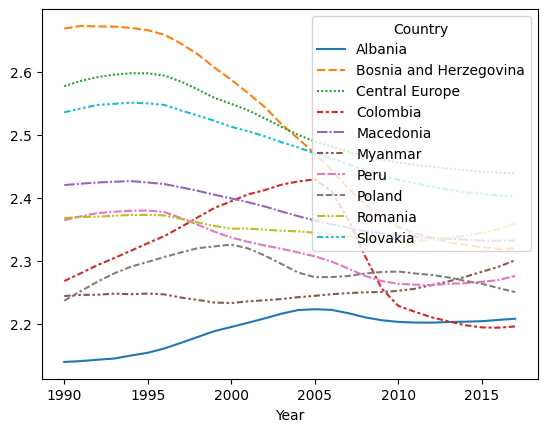

In [16]:
sns.lineplot(data=table_min)

Из графика видно, что у большинства стран из списка мин. топ-10 уровень депрессии постепенно снижается, только в Колумбии, к 2005 году резко повысилось значение, но потом сразу пошло на спад, а также исключением стала Албания, уровень депрессии в которой всегда минимален, но понемногу повышается

График изменения депрессии с 1990 по 2017 в странах с макс. депрессией

<Axes: xlabel='Year'>

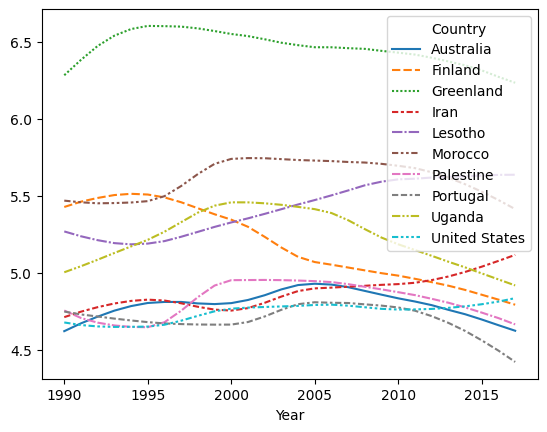

In [17]:
sns.lineplot(data=table_max)

Четко видно, что из всех стран на графике выделяется Гренландия, и я считаю, что это неудивительно,т.к. минимальное посутпление света от солнца плюс неблагоприятные условия для жизни не лучшим образом влияют на психику человека. Также могу добавить, что на этом графике присутствуют как бедные страны, н-р Уганда, так и богатые, даже богатых оказалось большинство. Я считаю, так получилось, потому что с одной стороны в богатых страных больше медицинских специалистов, которые могут поставить диагноз "Депрессия" и также с другой стороны у людей хватает денег и они сами могут часто обращаться к этим же специалистам.

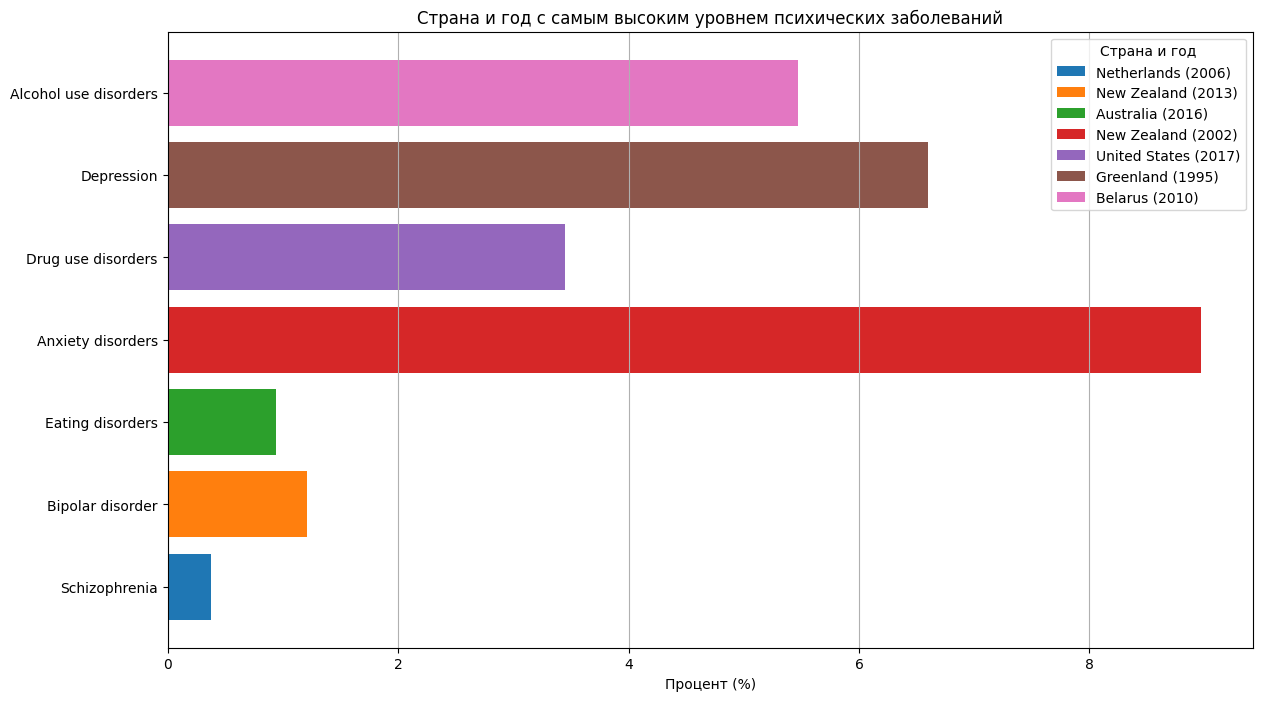

In [50]:
mental_illness_columns = [
    'Schizophrenia',
    'Bipolar disorder',
    'Eating disorders',
    'Anxiety disorders',
    'Drug use disorders',
    'Depression',
    'Alcohol use disorders'
]

max_values = []
for column in mental_illness_columns:
    max_row = df.loc[df[column].idxmax()]
    max_values.append({
        'Mental Illness': column,
        'Country': max_row['Country'],
        'Year': max_row['Year'],
        'Max Percentage': max_row[column]
    })

max_df = pd.DataFrame(max_values)


plt.figure(figsize=(14, 8))
for i, row in max_df.iterrows():
    plt.barh(row['Mental Illness'], row['Max Percentage'], label=f"{row['Country']} ({row['Year']})")

plt.xlabel('Процент (%)')
plt.title('Страна и год с самым высоким уровнем психических заболеваний')
plt.legend(title='Страна и год')
plt.grid(axis='x')
plt.show()

## Построение регрессии

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                6468 non-null   object 
 1   Code                   5488 non-null   object 
 2   Year                   6468 non-null   int64  
 3   Schizophrenia          6468 non-null   float64
 4   Bipolar disorder       6468 non-null   float64
 5   Eating disorders       6468 non-null   float64
 6   Anxiety disorders      6468 non-null   float64
 7   Drug use disorders     6468 non-null   float64
 8   Depression             6468 non-null   float64
 9   Alcohol use disorders  6468 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 505.4+ KB


In [19]:
df.columns

Index(['Country', 'Code', 'Year', 'Schizophrenia', 'Bipolar disorder',
       'Eating disorders', 'Anxiety disorders', 'Drug use disorders',
       'Depression', 'Alcohol use disorders'],
      dtype='object')

In [20]:
df_model1 = df.dropna(subset=['Depression', 'Schizophrenia', 'Bipolar disorder', 'Eating disorders',
                             'Anxiety disorders', 'Drug use disorders', 'Alcohol use disorders'])
x_mult = df_model1[['Schizophrenia', 'Bipolar disorder', 'Eating disorders',
                             'Anxiety disorders', 'Drug use disorders', 'Alcohol use disorders']]
y = df_model1['Depression']
x_mult_constant = sm.add_constant(x_mult)
model1 = sm.OLS(y, x_mult_constant).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             Depression   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     305.7
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:42:19   Log-Likelihood:                -5640.8
No. Observations:                6468   AIC:                         1.130e+04
Df Residuals:                    6461   BIC:                         1.134e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.35

In [21]:
print(sm.OLS(zscore(y), zscore(x_mult)).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Depression   R-squared (uncentered):                   0.221
Model:                            OLS   Adj. R-squared (uncentered):              0.220
Method:                 Least Squares   F-statistic:                              305.7
Date:                Fri, 19 Jul 2024   Prob (F-statistic):                        0.00
Time:                        17:42:19   Log-Likelihood:                         -8369.6
No. Observations:                6468   AIC:                                  1.675e+04
Df Residuals:                    6462   BIC:                                  1.679e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [22]:
print('R^2 = {:f}'.format(model1.rsquared))
print('F-test significance = {:f}'.format(model1.f_pvalue))

R^2 = 0.221111
F-test significance = 0.000000


In [23]:
f'Статистически значимые параметры модели: {model1.pvalues[model1.pvalues < 0.05].index.values}'

"Статистически значимые параметры модели: ['const' 'Schizophrenia' 'Bipolar disorder' 'Eating disorders'\n 'Anxiety disorders' 'Drug use disorders' 'Alcohol use disorders']"

In [24]:
f'Статистически не значимые параметры модели: {model1.pvalues[model1.pvalues > 0.05].index.values}'

'Статистически не значимые параметры модели: []'

Результаты исследования регрессии оказались для меня лично неожиданными:

Оказалось, что больше всего на увеличение депрессии в среднем по стране влияет процент пищевых расстройств, и надо отметить, что даже больше чем расстройства, связанные с приемом алкоголя или наркотиков